most notably this notebook focuses on classication of the breast growths into benign or malignant and predicting the probabilities of the growths falling in either of the two categories am going to create a classification model with
knn which will help us predict the class of the growth

In [1]:
#set import
df = pd.read_csv("data.csv")
df.head()



<IPython.core.display.Javascript object>

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
#basic statistical information
df.describe()



,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [4]:
#check for missing values in the set
df.isnull().sum()



id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

No missing values in the dataset, drop the Unnamed column

In [5]:
#drop unnamed columns
df.drop(["Unnamed: 32"],axis = 1,inplace=True)



In [6]:
df["diagnosis"].value_counts()



B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
df.dtypes





id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [8]:
# create a knn model to classify the class of the suspected growth
import sklearn
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier



In [9]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
X = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
y = df["diagnosis"].values
#normalizing  data
from sklearn.preprocessing import StandardScaler

X = preprocessing.StandardScaler().fit(X).transform(X)



In [11]:
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [15]:
# split the set into training and testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
confusion_matrix = confusion_matrix(y_test,yhat)

#confusion matrix
print(confusion_matrix)
print('\n')

print(classification_report(y_test,yhat))

#train and test sizes
print("Train set:",X_train.shape,y_train.shape)
print("Test set:",X_test.shape,y_test.shape)

[[80  0]
 [ 2 32]]


              precision    recall  f1-score   support

           B       0.98      1.00      0.99        80
           M       1.00      0.94      0.97        34

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114

Train set: (455, 30) (455,)
Test set: (114, 30) (114,)


from the above confusion matrix it shows  that out of the 114 test set data 112 were correctly classified while 2 were not correctly classified

In [13]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [14]:
#predicting with the predicting set
yhat = model.predict(X_test)
yhat[0:5]

array(['B', 'B', 'M', 'M', 'B'], dtype=object)

In [16]:
#testing the accuracy of the model 

print("Train set acuracy",metrics.accuracy_score(y_train,model.predict(X_train)))
print("Test set accuracy",metrics.accuracy_score(y_test,yhat))

Train set acuracy 0.9714285714285714
Test set accuracy 0.9824561403508771


In [17]:
#choosing the optimal value for k to improve model accuracy
ks = []

for i in range(1,40):
    
    KNN_model = KNeighborsClassifier(n_neighbors=i)
    KNN_model.fit(X_train,y_train)
    yhat = KNN_model.predict(X_test)
    ks.append(np.mean(yhat != y_test))
ks

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.05263157894736842,
 0.02631578947368421,
 0.017543859649122806,
 0.017543859649122806,
 0.03508771929824561,
 0.02631578947368421,
 0.043859649122807015,
 0.03508771929824561,
 0.02631578947368421,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.008771929824561403,
 0.008771929824561403,
 0.008771929824561403,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.017543859649122806,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.03508771929824561,
 0.03508771929824561,
 0.03508771929824561,
 0.03508771929824561,
 0.02631578947368421]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'ks')

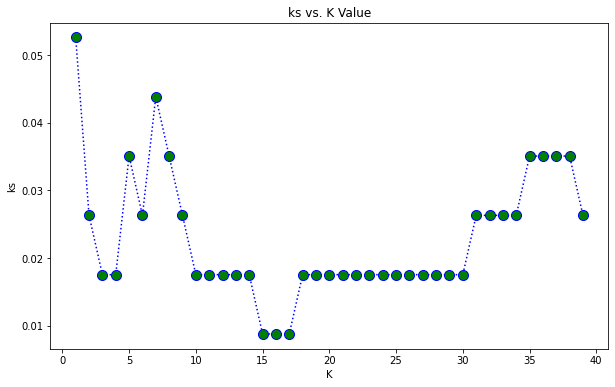

In [18]:
#visualizing the different values for k
plt.figure(figsize=(10,6))
plt.plot(range(1,40),ks,color='blue', linestyle="dotted", marker='o',
         markerfacecolor='green', markersize=10)
plt.title('ks vs. K Value')
plt.xlabel('K')
plt.ylabel('ks')

In this case we choose the lowest value of k higher than k=1 and the best optimal value in this case is 3 or 4 

Now creating the optimized model with k = 3

In [22]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

yhat = model.predict(X_test)
yhat[0:5]
 
# print(confusion_matrix(y_test,yhat))
# print('\n')
print(classification_report(y_test,yhat))



              precision    recall  f1-score   support

           B       0.98      1.00      0.99        80
           M       1.00      0.94      0.97        34

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



Due to the medical nature of the dataset, it is important  having high accuracy and 
low false negative (FN) predictions,as this would save lives. 
We therefore conclude that the KNN model with K=3 is the optimal classification model for the Wisconsin breast cancer dataset with average accuracy of 0.99